# Homework for Week 3- Census Data Exploration 
## Chase Engelhardt
In this Assignment I'm going to be exploring race data for the city of Los Angeles. I'll need to import, clean, and sort data from the census, merge it with geographic data, and then intersect it with a shapefile from the city to be able to analyize it. After that I can use the plot functions I learned in class. 

In [1]:
# first I'll import pandas and the data files. 

In [12]:
import pandas as pd

In [13]:
import geopandas as gpd
import fiona
import geopandas.geoseries  

In [14]:
#import Census data 

In [15]:
df = pd.read_csv('data/R13285078_SL140.csv') 
df.head()

,Geo_QNAME,Geo_NAME,Geo_FIPS,Geo_NATION,Geo_STATE,Geo_COUNTY,Geo_CS,Geo_CT,Geo_BG,Geo_PLACE,...,SE_T032_000,SE_T032_001,SE_T032_002,SE_T032_003,SE_T032_004,SE_T032_005,SE_T032_006,SE_T032_007,SE_T032_008,SE_T032_009
0,"Census Tract 1011.10, Los Angeles County, Cali...",Census Tract 1011.10,6037101110,0,6,37,NaN,101110,NaN,NaN,...,-1.110223e-14,0.049290,-0.049290,1.512917,-0.244622,-0.153817,-1.462276,0.077855,-0.349909,0.570562
1,"Census Tract 1011.22, Los Angeles County, Cali...",Census Tract 1011.22,6037101122,0,6,37,NaN,101122,NaN,NaN,...,0.000000e+00,-1.154605,1.154605,3.606017,0.121938,0.078598,-2.994804,-0.027293,0.344027,0.026121
2,"Census Tract 1012.20, Los Angeles County, Cali...",Census Tract 1012.20,6037101220,0,6,37,NaN,101220,NaN,NaN,...,0.000000e+00,-5.496817,5.496817,2.942280,-0.053726,-0.207472,2.438299,-0.059471,0.538784,-0.101877
3,"Census Tract 1012.21, Los Angeles County, Cali...",Census Tract 1012.21,6037101221,0,6,37,NaN,101221,NaN,NaN,...,1.110223e-14,0.104239,-0.104239,2.610873,-0.472101,-0.029374,-0.457609,-0.000254,0.144757,-1.900531
4,"Census Tract 1012.22, Los Angeles County, Cali...",Census Tract 1012.22,6037101222,0,6,37,NaN,101222,NaN,NaN,...,5.329071e-15,-3.964528,3.964528,7.019682,-0.971069,0.028590,-2.045464,0.000000,0.284900,-0.352113


In [16]:
#time to check the data

In [17]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 65 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Geo_QNAME    2498 non-null   object 
 1   Geo_NAME     2498 non-null   object 
 2   Geo_FIPS     2498 non-null   int64  
 3   Geo_NATION   2498 non-null   int64  
 4   Geo_STATE    2498 non-null   int64  
 5   Geo_COUNTY   2498 non-null   int64  
 6   Geo_CS       0 non-null      float64
 7   Geo_CT       2498 non-null   int64  
 8   Geo_BG       0 non-null      float64
 9   Geo_PLACE    0 non-null      float64
 10  Geo_CD       0 non-null      float64
 11  Geo_SLDUC    0 non-null      float64
 12  Geo_SLDLC    0 non-null      float64
 13  Geo_MSAMSA   0 non-null      float64
 14  Geo_CSA      0 non-null      float64
 15  SE_T028_000  2498 non-null   int64  
 16  SE_T028_001  2498 non-null   int64  
 17  SE_T028_002  2498 non-null   int64  
 18  SE_T028_003  2498 non-null   int64  
 19  SE_T02

In [18]:
#Addressing the FIPS dilemma 

In [19]:
df.Geo_FIPS.head()

0    6037101110
1    6037101122
2    6037101220
3    6037101221
4    6037101222
Name: Geo_FIPS, dtype: int64

In [20]:
df = pd.read_csv(
    'data/R13285078_SL140.csv',
    dtype=
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str
    }
)


In [21]:
#check for and drop empty columns

In [22]:
df.columns[df.isna().all()].tolist()

['Geo_CS',
 'Geo_BG',
 'Geo_PLACE',
 'Geo_CD',
 'Geo_SLDUC',
 'Geo_SLDLC',
 'Geo_MSAMSA',
 'Geo_CSA']

In [23]:
df = df.dropna(axis=1,how="all")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 57 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Geo_QNAME    2498 non-null   object 
 1   Geo_NAME     2498 non-null   object 
 2   Geo_FIPS     2498 non-null   object 
 3   Geo_NATION   2498 non-null   int64  
 4   Geo_STATE    2498 non-null   object 
 5   Geo_COUNTY   2498 non-null   object 
 6   Geo_CT       2498 non-null   int64  
 7   SE_T028_000  2498 non-null   int64  
 8   SE_T028_001  2498 non-null   int64  
 9   SE_T028_002  2498 non-null   int64  
 10  SE_T028_003  2498 non-null   int64  
 11  SE_T028_004  2498 non-null   int64  
 12  SE_T028_005  2498 non-null   int64  
 13  SE_T028_006  2498 non-null   int64  
 14  SE_T028_007  2498 non-null   int64  
 15  SE_T028_008  2498 non-null   int64  
 16  SE_T028_009  2498 non-null   int64  
 17  SE_T029_000  2498 non-null   int64  
 18  SE_T029_001  2498 non-null   int64  
 19  SE_T02

In [24]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.sample(10)

,Geo_QNAME,Geo_NAME,Geo_FIPS,Geo_NATION,Geo_STATE,Geo_COUNTY,Geo_CT,SE_T028_000,SE_T028_001,SE_T028_002,SE_T028_003,SE_T028_004,SE_T028_005,SE_T028_006,SE_T028_007,SE_T028_008,SE_T028_009,SE_T029_000,SE_T029_001,SE_T029_002,SE_T029_003,SE_T029_004,SE_T029_005,SE_T029_006,SE_T029_007,SE_T029_008,SE_T029_009,SE_T030_000,SE_T030_001,SE_T030_002,SE_T030_003,SE_T030_004,SE_T030_005,SE_T030_006,SE_T030_007,SE_T030_008,SE_T030_009,SE_T031_000,SE_T031_001,SE_T031_002,SE_T031_003,SE_T031_004,SE_T031_005,SE_T031_006,SE_T031_007,SE_T031_008,SE_T031_009,SE_T032_000,SE_T032_001,SE_T032_002,SE_T032_003,SE_T032_004,SE_T032_005,SE_T032_006,SE_T032_007,SE_T032_008,SE_T032_009
1855,"Census Tract 5511.02, Los Angeles County, Cali...",Census Tract 5511.02,06037551102,0,06,037,551102,5451,4277,1174,386,382,12,242,9,43,100,5503,4350,1153,457,409,18,195,13,22,39,-52,-73,21,-71,-27,-6,47,-4,21,61,-0.944939,-1.678161,1.821336,-15.536105,-6.601467,-33.333333,24.102564,-30.769231,95.454545,156.410256,1.110223e-14,-0.585125,0.585125,-1.223292,-0.424421,-0.106951,0.896031,-0.071127,0.389064,1.125821
873,"Census Tract 2395.02, Los Angeles County, Cali...",Census Tract 2395.02,06037239502,0,06,037,239502,3697,2945,752,59,628,6,11,1,21,26,3372,2574,798,8,752,7,4,1,0,26,325,371,-46,51,-124,-1,7,0,21,0,9.638197,14.413364,-5.764411,637.500000,-16.489362,-14.285714,175.000000,0.000000,NaN,0.000000,0.000000e+00,3.324664,-3.324664,1.358641,-5.314559,-0.045298,0.178915,-0.002607,0.568028,-0.067783
433,"Census Tract 1881, Los Angeles County, California",Census Tract 1881,06037188100,0,06,037,188100,4070,1980,2090,1415,98,6,422,3,14,132,4076,2274,1802,1111,93,6,521,0,10,61,-6,-294,288,304,5,0,-99,3,4,71,-0.147203,-12.928760,15.982242,27.362736,5.376344,0.000000,-19.001919,NaN,40.000000,116.393443,5.329071e-15,-7.141342,7.141342,7.509470,0.126214,0.000217,-2.413589,0.073710,0.098642,1.746678
559,"Census Tract 2036.01, Los Angeles County, Cali...",Census Tract 2036.01,06037203601,0,06,037,203601,2662,2551,111,43,19,6,22,0,8,13,2910,2836,74,38,4,5,16,0,11,0,-248,-285,37,5,15,1,6,0,-3,13,-8.522337,-10.049365,50.000000,13.157895,375.000000,20.000000,37.500000,NaN,-27.272727,NaN,-3.552714e-15,-1.626842,1.626842,0.309485,0.576292,0.053573,0.276618,0.000000,-0.077481,0.488355
655,"Census Tract 2118.03, Los Angeles County, Cali...",Census Tract 2118.03,06037211803,0,06,037,211803,3602,714,2888,280,193,0,2331,0,24,60,3529,589,2940,188,243,1,2450,2,9,47,73,125,-52,92,-50,-1,-119,-2,15,13,2.068575,21.222411,-1.768707,48.936170,-20.576132,-100.000000,-4.857143,-100.000000,166.666667,27.659574,-5.773160e-15,3.132040,-3.132040,2.446171,-1.527669,-0.028337,-4.710718,-0.056673,0.411267,0.333919
1398,"Census Tract 4308.03, Los Angeles County, Cali...",Census Tract 4308.03,06037430803,0,06,037,430803,5363,610,4753,919,43,3,3640,0,23,125,5431,531,4900,1380,29,22,3376,3,6,84,-68,79,-147,-461,14,-19,264,-3,17,41,-1.252071,14.877589,-3.000000,-33.405797,48.275862,-86.363636,7.819905,-100.000000,283.333333,48.809524,4.218847e-15,1.597026,-1.597026,-8.273754,0.267818,-0.349143,5.710795,-0.055238,0.318388,0.784109
2132,"Census Tract 6033.01, Los Angeles County, Cali...",Census Tract 6033.01,06037603301,0,06,037,603301,3914,1132,2782,374,278,5,1911,25,28,161,3828,991,2837,343,252,2,2062,33,8,137,86,141,-55,31,26,3,-151,-8,20,24,2.246604,14.228052,-1.938668,9.037901,10.317460,150.000000,-7.322987,-24.242424,250.000000,17.518248,-5.329071e-15,3.033627,-3.033627,0.595149,0.519636,0.075500,-5.041517,-0.223336,0.506394,0.534547
1242,"Census Tract 4033.17, Los Angeles County, Cali...",Census Tract 4033.17,06037403317,0,06,037,403317,5098,1659,3439,958,389,9,1866,5,23,189,5303,1740,3563,1369,505,5,1507,11,30,135,-205,-81,-124,-411,-116,4,359,-6,-7,54,-3.865736,-4.655172,-3.480213,-30.021914,-22.970297,80.000000,23.822163,-54.545455,-23.333333,40.000000,5.551115e-15,-0.269443,0.269443,-7.023893,-1.892468,0.082254,8.184713,-0.109352,-0.114560,1.161607
1724,"Census Tract 5342.03, Los Angeles County, Cal

In [25]:
#rename the data after referencing data dictionary. First define columns to keep

In [26]:
columns_to_keep = ['Geo_FIPS',
                   'SE_T028_000',       
                   'SE_T028_001',      
                   'SE_T028_002',    
                   'SE_T028_003',     
                   'SE_T028_004',  
                   'SE_T028_005',
                    'SE_T028_006',
                   'SE_T028_007', 
                   'SE_T028_008',
                  'SE_T028_009']   
df2 = df[columns_to_keep]
df2.sample(11)

,Geo_FIPS,SE_T028_000,SE_T028_001,SE_T028_002,SE_T028_003,SE_T028_004,SE_T028_005,SE_T028_006,SE_T028_007,SE_T028_008,SE_T028_009
1294,06037405102,4793,3529,1264,175,42,4,999,4,8,32
1115,06037301100,6571,906,5665,4702,81,0,658,2,16,206
1344,06037408134,2640,862,1778,168,124,5,1416,1,7,57
661,06037212102,2579,721,1858,367,200,1,1178,0,23,89
1951,06037570503,3789,2192,1597,400,539,4,479,39,19,117
1173,06037320102,3573,3308,265,159,25,11,50,0,5,15
107,06037113322,4251,1027,3224,1942,191,9,887,20,20,155
1087,06037296901,4148,2660,1488,857,257,17,196,9,14,138
961,06037267406,2180,385,1795,1309,58,1,297,2,13,115
1509,06037480102,4325,1056,3269,578,64,3,2482,1,21,120


In [27]:
#now to rename them

In [28]:
columns = list(df2) # this is the same as df.columns.to_list()

df2.columns = ['FIPS',
'Total Population',
'Hispanic',
'Non Hispanic',
'White',
'African American or Black',
'American Indian and Alaska Native',
'Asian',
'Native Hawaiian and Other Pacific Islander',
'Other',
'Two or more Races']

df2.head()


,FIPS,Total Population,Hispanic,Non Hispanic,White,African American or Black,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Other,Two or more Races
0,06037101110,4926,1381,3545,2840,65,7,434,8,14,177
1,06037101122,3728,542,3186,2614,31,7,392,0,23,119
2,06037101220,3344,1081,2263,1751,34,4,352,0,21,101
3,06037101221,3444,1178,2266,1840,73,3,246,3,10,91
4,06037101222,2808,1040,1768,1455,76,3,148,0,8,78


In [29]:
#I need to merge this dataframe with census tracts with a geography column so I can later cut census tracts not in the City of LA. First to import that data 

In [30]:
tracts=gpd.read_file('data/Census_Tracts_2020.geojson')
tracts.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


In [31]:
#  subset the data for the only parts we need
tracts = tracts[['CT20','geometry']]
tracts.head()

,CT20,geometry
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


In [32]:
# create a FIPS column
tracts['FIPS'] ='06' + '037' + tracts['CT20']
tracts.head()

,CT20,geometry,FIPS
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222


In [33]:
#Great. Now to merge it with the other dataframe
tracts_race=tracts.merge(df2,on="FIPS")
tracts_race.head()

,CT20,geometry,FIPS,Total Population,Hispanic,Non Hispanic,White,African American or Black,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Other,Two or more Races
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110,4926,1381,3545,2840,65,7,434,8,14,177
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122,3728,542,3186,2614,31,7,392,0,23,119
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220,3344,1081,2263,1751,34,4,352,0,21,101
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221,3444,1178,2266,1840,73,3,246,3,10,91
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222,2808,1040,1768,1455,76,3,148,0,8,78


In [34]:
#Beauty. Now that the census data is in good shape, I want to upload a shapefile of City of LA so I can overlay them and exclude tracts that aren't in the City of LA

In [35]:
zipfile = "data/City_Boundary.zip"
cityofla = gpd.read_file(zipfile)

In [36]:
cityofla.head

<bound method NDFrame.head of    OBJECTID CITY                                           geometry
0         1   IN  POLYGON ((-118.42000 34.32917, -118.41948 34.3...>

In [37]:
#Time to intersect the layers to exclude tracts not in City of LA 

In [38]:
citytracts = cityofla.overlay(tracts_race, how='intersection')

In [39]:
#now let's see if that worked
citytracts.info(verbose=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1291 entries, 0 to 1290
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype   
---  ------                                      --------------  -----   
 0   OBJECTID                                    1291 non-null   int64   
 1   CITY                                        1291 non-null   object  
 2   CT20                                        1291 non-null   object  
 3   FIPS                                        1291 non-null   object  
 4   Total Population                            1291 non-null   int64   
 5   Hispanic                                    1291 non-null   int64   
 6   Non Hispanic                                1291 non-null   int64   
 7   White                                       1291 non-null   int64   
 8   African American or Black                   1291 non-null   int64   
 9   American Indian and Alaska Native           1291 non-null   int64 

In [40]:
#very cool. Let's get some stats 
citytracts['Hispanic'].describe()

count    1291.000000
mean     1649.700232
std      1215.622478
min         0.000000
25%       600.000000
50%      1460.000000
75%      2450.000000
max      6710.000000
Name: Hispanic, dtype: float64

<AxesSubplot: ylabel='Frequency'>

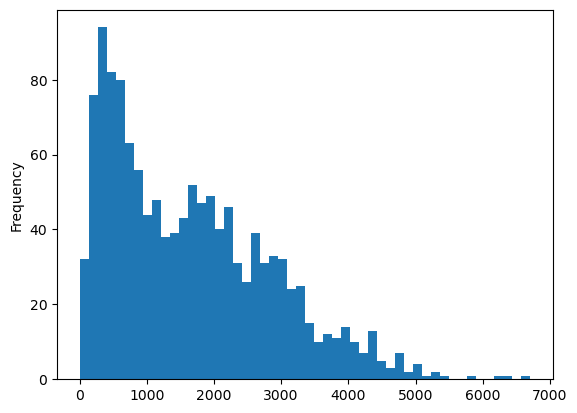

In [41]:
#now for a histogram
citytracts['Hispanic'].plot.hist(bins=50)

<AxesSubplot: title={'center': 'Top 10 Census Tracts with Highest Population in Los Angeles County in 2020'}, ylabel='FIPS'>

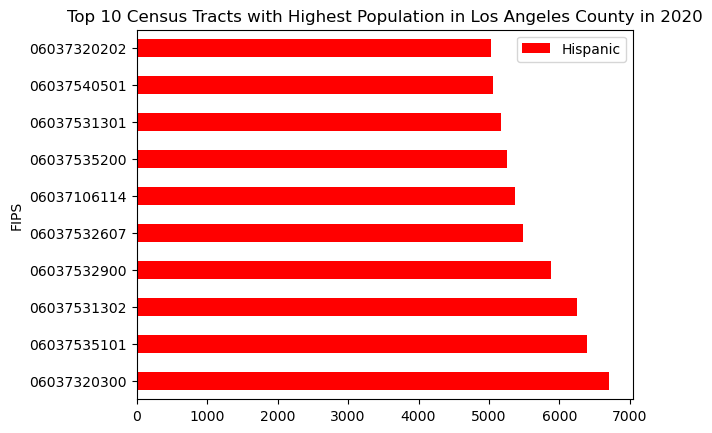

In [42]:
#sort and plot data on tracts with the highest Hispanic Populations in the City of Los Angeles
df_sorted = citytracts.sort_values(by='Hispanic', ascending=False)
df_sorted.head(10).plot.barh(x='FIPS',
                            y='Hispanic', 
                            title='Top 10 Census Tracts with Highest Population in Los Angeles County in 2020',
                            color='red')

<AxesSubplot: title={'center': 'Top 10 Census Tracts with Highest Population in Los Angeles County in 2020'}, ylabel='FIPS'>

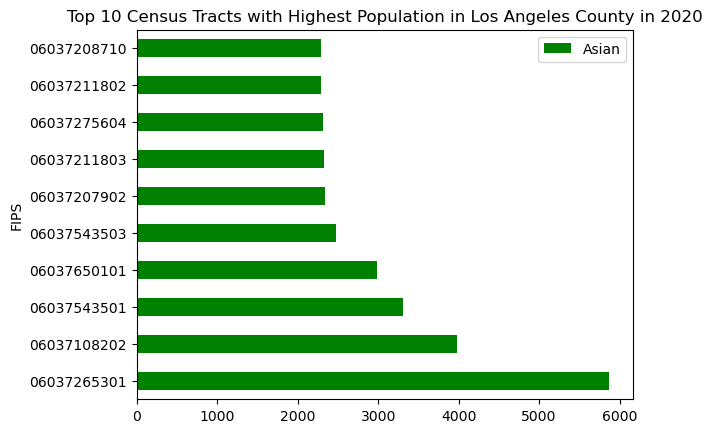

In [43]:
#now for other Populations 
df_sorted = citytracts.sort_values(by='Asian', ascending=False)
df_sorted.head(10).plot.barh(x='FIPS',
                            y='Asian', 
                            title='Top 10 Census Tracts with Highest Population in Los Angeles County in 2020',
                            color='green')

<AxesSubplot: title={'center': 'Top 10 Census Tracts with Highest Population in Los Angeles County in 2020'}, ylabel='FIPS'>

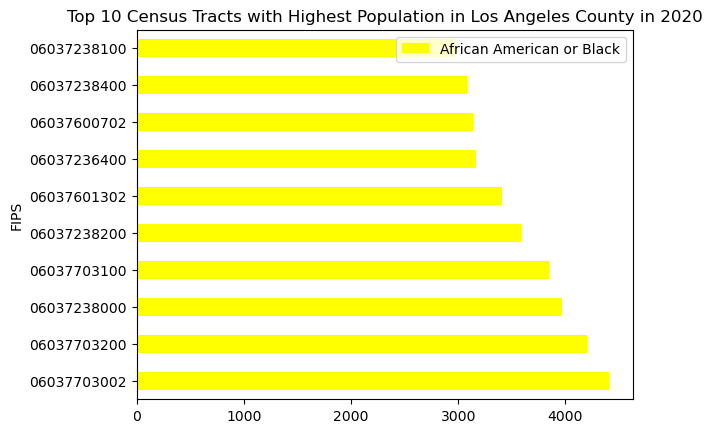

In [44]:
df_sorted = citytracts.sort_values(by='African American or Black', ascending=False)
df_sorted.head(10).plot.barh(x='FIPS',
                            y='African American or Black', 
                            title='Top 10 Census Tracts with Highest Population in Los Angeles County in 2020',
                            color='yellow')

<AxesSubplot: >

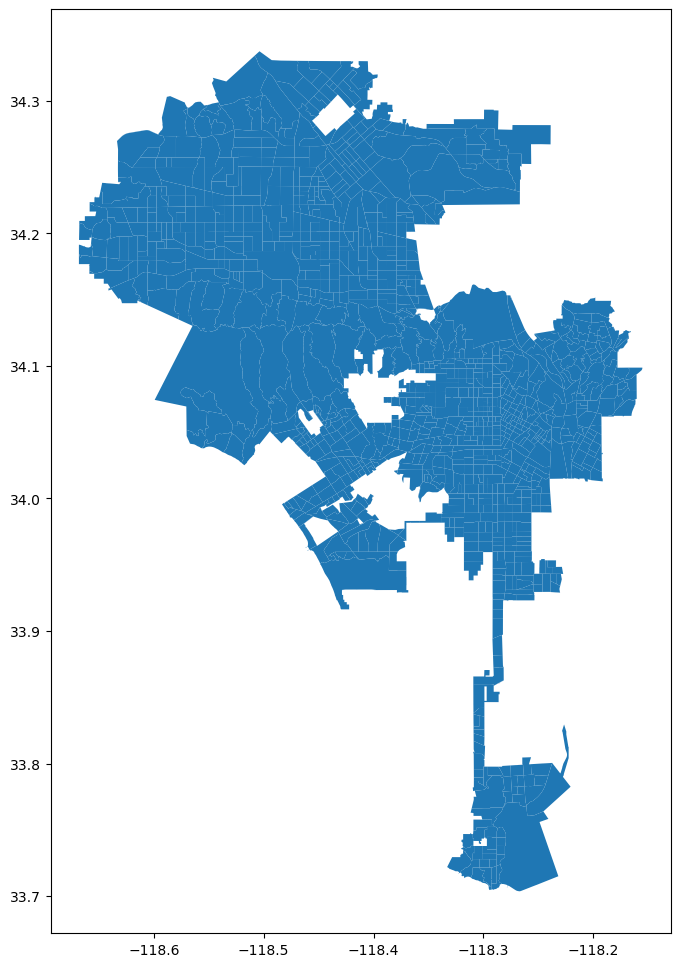

In [45]:
#now let's try mapping the data 
citytracts.plot(figsize=(14,12))

<AxesSubplot: >

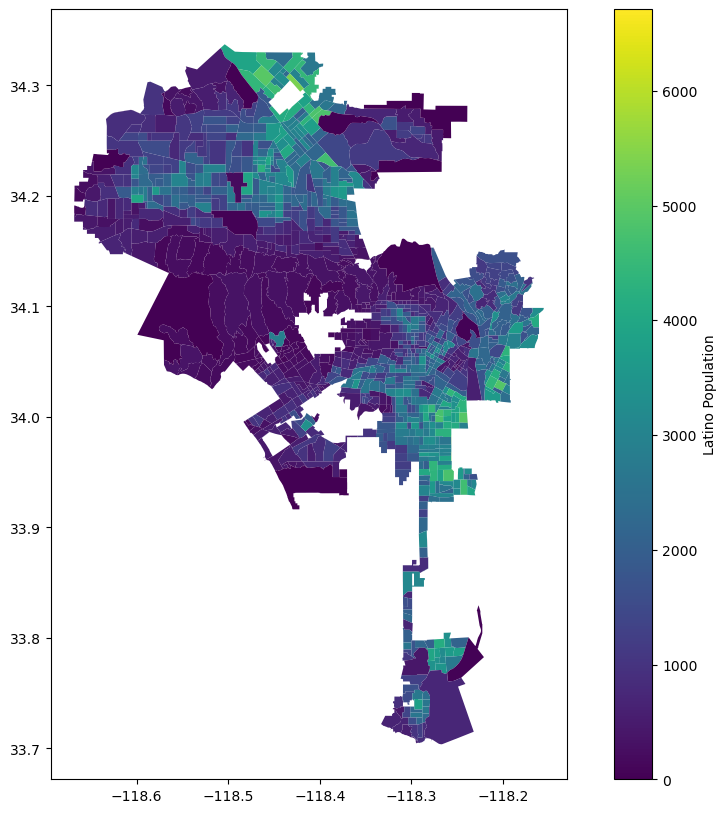

In [47]:
#adding in a variable 
citytracts.plot(figsize=(12,10),
                 column='Hispanic',

           

           legend=True,

           legend_kwds={'label': "Latino Population"})